# Programmieraufgabe 3: Interpolationspolynom in Newton-Darstellung

**Abgabe in den Programmiertutorien am 12. und 13. Dezember 2024. Falls Sie Unterstützung bei der Bearbeitung der Programmieraufgabe brauchen, wenden Sie sich frühzeitig an Ihren Tutor oder melden Sie sich im Forum.**

Benötigte Module für dieses Notebook:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Das Horner-Schema

**(a) Zur Auswertung eines Polynoms $p(x)$ in Monomdarstellung $p(x)=c_nx^n+c_{N-1}x^{N-1}+\dots+c_1x+c_0$ kann das Horner-Schema genutzt werden, welches durch geschicktes Ausklammern von $x$ den Aufwand der Auswertung reduziert. Schreiben Sie eine Prozedur `horner_monom`, die für gegebene Koeffizienzen $c_0,\dots,c_n$ sowie eine Stelle $x$ den Wert $p(x)$ über das Horner-Schema berechnet und zurückgibt. Die Koeffizienten $c_0,\cdots,c_n$ seien dabei in einem Vektor `c` gespeichert.**

**Lösung:** Das Horner-Schema nutzt die Darstellung
$$p(x) = c_0 + x \left( c_1 + x \left( \ldots + x \left( c_{n-1} + xc_n \right) \right) \right),$$
welche von innen nach außen ausgerwertet wird:

In [3]:
def horner_monom(c, x):    
    # c enthält die Koeffizienten c_0, ..., c_n, insgesamt also n+1 Stück
    n = len(c) - 1  
    
    px = c[n]
    for i in range(n-1, -1, -1): # man beachte die Argumente des range-Befehls
        px = c[i] + x * px
    return px 

**(b) Eine weitere Polynom-Darstellung, die z.B. zur Aufstellung des Interpolationspolynoms mit Hilfe des Newton-Schemas verwendet wird, ist die _Newton-Basis-Darstellung_ $p(x)=d_n(x-x_0)\cdots(x-x_{n-1})+d_{n-1}(x-x_0)\cdots(x-x_{n-2})+\dots+d_1(x-x_0)+d_0$ mit Koeffizienten $d_0,\ldots,d_n$ und Knoten $x_0,\ldots,x_n$. Modifizieren Sie das Horner-Schema dahingehend, dass auch Polynome, die in dieser Darstellung gegeben sind, effizient ausgewertet werden können. Hier wird also nicht nur eine Stelle $x$ und ein Vektor `d` der Koeffizienten übergeben, sondern zusätzlich ein Vektor `knots` welcher die Knoten $x_0,\ldots,x_n$ enthält.**

**Lösung:** Es gilt
$$p(x)=  d_0 + (x-x_0) \left(d_1 + (x-x_1) \left( \ldots + (x-x_{n-2}) \left( d_{n-1} + (x-x_{n-1})d_n \right) \right) \right). $$
Man kann also analog zum Horner-Schema vorgehen, muss jedoch in jedem Schritt der Vorschleife das bisherige (innere) Polynom mit dem Linearfaktor $(x-x_i)$ (anstatt nur mit $x$) multiplizieren.

In [4]:
def horner_newton(d, knots, x):
    # d enthält die Koeffizienten d_0, ..., d_n, insgesamt also n+1 Stück
    n = len(d) - 1      
    
    px = d[n]   
    for i in range(n-1, -1, -1):
        px = d[i] + (x-knots[i]) * px 
    return px

**(c) Um die Prozeduren aus Teil (a) und (b) zu testen, betrachten wir das Polynom
$$p(x) = 3x^3 + 2x^2 + 2 = 1 + 1\cdot(x+1) + 2\cdot(x+1)(x-0) + 3\cdot(x+1)(x-0)(x-1).$$
Ergänzen Sie den Code unten an den mit `###` markierten Stellen so, dass das Polynom zwei mal geplottet wird, wobei die Funktionswerte von $p$ einmal über das Horner-Schema aus Teil (a) und einmal über das modifizierte Horner-Schema aus Teil (b) berechnet werden.**

_Hinweis_: Achten Sie auf die richtige Reihenfolge der Koeffizienten in den Vektoren `c`, `d` und `knots`.

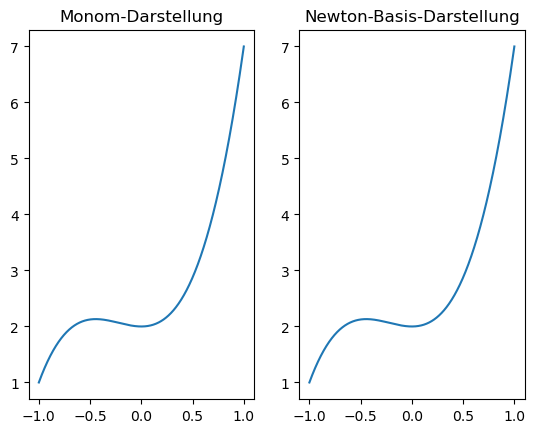

In [5]:
x = np.linspace(-1, 1, 1000)

# Polynom p ausgewertet über die Monom-Darstellung:
fig, axs = plt.subplots(1, 2)
c = np.array([2,0,2,3]) ###
axs[0].plot(x, horner_monom(c, x)) ###
axs[0].set_title('Monom-Darstellung')

# Polynom p ausgewertet über die Newton-Basis-Darstellung:
d  = np.array([1,1,2,3])  ###
Xn = np.array([-1,0,1]) ###
axs[1].plot(x, horner_newton(d, Xn, x)) ###
axs[1].set_title('Newton-Basis-Darstellung')

plt.show()

# 2. Dividierte Differenzen

**Schreiben Sie eine Prozedur, welche die dividierten Differenzen aus Definition 2.1 für gegebene Punkte $(x_0,y_0), \ldots (x_n,y_n)$ berechnet und zurück gibt. Übergeben Sie die Knoten $x_0,\ldots,x_n$ über einen Vektor `knots` und die Werte $y_0,\ldots,y_n$ über einen Vektor `vals`.**

_Hinweis:_ Gehen Sie wie in dem rekursiven Schema aus Definition 2.1 vor. Definieren Sie dazu in Ihrer Prozdur eine Matrix `Delta` passender Größe und speichern Sie alle Werte des Schemas in der linken unteren Hälfte dieser Matrix. Sie können Ihre Prozedur zum Beispiel mit den Daten aus Beispiel 2.4 aus der Vorlesung/dem Skript testen.

In [6]:
def div_diff(knots,vals):
    Delta = np.zeros((len(knots),len(knots)))
    Delta[:,0] = vals
    for j in range(1,len(knots)):
         for i in range(j,len(knots)):
             Delta[i,j] = (Delta[i,j-1] - Delta[i-1,j-1]) / (knots[i]-knots[i-j])
 
    return Delta

In [7]:
knots = np.array([-1, 0, 1, 3])
vals = np.array([-2, 3, 2, 0])
Delta = div_diff(knots,vals)
print("Dividierte-Differenzen-Schema:\n",Delta)

Dividierte-Differenzen-Schema:
 [[-2.    0.    0.    0.  ]
 [ 3.    5.    0.    0.  ]
 [ 2.   -1.   -3.    0.  ]
 [ 0.   -1.    0.    0.75]]


# 3. Interpolationspolynom in Newton-Darstellung

**(a) Schreiben Sie eine Prozedur, die zu einer gegebenen Funktion $f$, einem gegebenen Intervall $[a,b]$ und gegebenen Knoten $x_0,\ldots,x_n$ die Koeffizienten des Interpolationspolynoms zu den Punkten $(x_0,f(x_0)), \ldots, (x_n,f(x_n))$ in Newton-Darstellung berechnet und anschließend die Funktion $f$ und das Interpolationspolynom in einem gemeinsamen Plot visualisiert. In dem Plot sollen zusätzlich die verwendeten Interpolationspunkte markiert werden.**

_Hinweis:_ In Ihrer Prozedur sollen Sie die Prozeduren aus Teil 1. und 2. geeignet verwenden.

In [8]:
def plot_IP(f,a,b,knots):
    # Berechnung der Koeffizienten des IPs in Newton-Darstellung
    vals = f(knots)
    Delta = div_diff(knots,vals)
    d = np.diag(Delta) 

    # Plot von f
    x = np.linspace(a,b,1000)
    plt.plot(x,f(x),label = 'f')

    # Plot des IPs
    plt.plot(x,horner_newton(d,knots,x),label = 'IP')

    # Markierung der Interpolationspunkte
    plt.plot(knots,vals,'ro', label = 'Stützpunkte')    
    
    plt.legend()
    plt.show()

**(b) Testen Sie die Prozedur aus Teil (a) mit der Funktion $f:[0,3\pi]\to\mathbb{R}, x \mapsto x\sin(x)$ unter Verwendung von 6 äquidistanten Stützstellen im Intervall $[0,3\pi]$. Was passiert wenn Sie die Anzahl an Stützstellen erhöhen, z.B. auf 8, 20 oder 50? Erklären Sie die Unterschiede.**

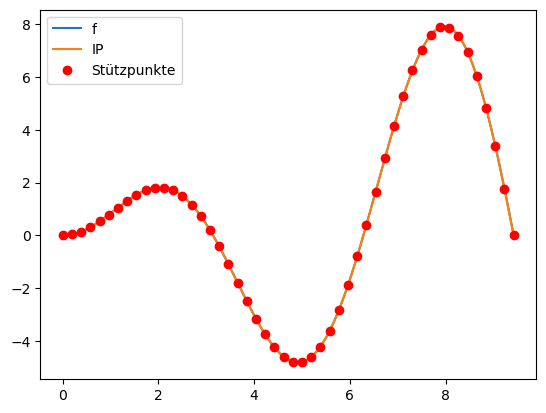

In [9]:
def f(x):
    return x*np.sin(x)

a = 0
b = 3*np.pi
n = 50 # Anzahl Stützstellen
knots = np.linspace(a,b,n)
plot_IP(f,a,b,knots)

**(c) Wenden Sie die Prozedur aus Teil (a) auf die Funktion $f:[-1,1] \to \mathbb{R}, x\mapsto \frac{1}{1+(5x)^2}$ an und beobachten Sie erneut, wie sich das Ergebnis in Abhängigkeit der Anzahl an Stützstellen verändert. Haben Sie eine Vermutung, was der Grund für dieses Verhalten sein könnte?**

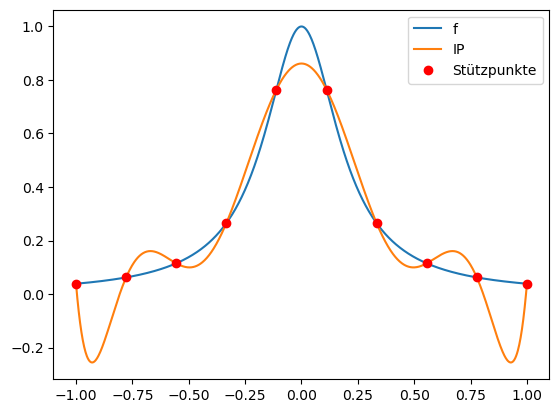

In [11]:
def f(x):
    return 1/(1+(5*x)**2)

a = -1
b = 1
n = 10 # Anzahl Stützstellen
knots = np.linspace(a,b,n)
plot_IP(f,a,b,knots)